# Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the cleaned data

In [3]:
c_job = pd.read_csv('jobs_cleaned.csv',delimiter=',')

In [101]:
c_job.head()

,title,company,category,days_since_posted,location,url,region,posted_date
0,AI Automation Expert,Contra,Full Stack Programming,0,"San Francisco, CA",https://weworkremotely.com/company/contra,US,2025-05-15
1,Remote Full-Stack TypeScript Engineer,Glama,Full Stack Programming,0,"Miami, FL",https://weworkremotely.com/company/glama,US,2025-05-15
2,Senior React Full-stack Developer,Lemon.io,Full Stack Programming,0,"New York, NY",https://weworkremotely.com/company/lemon-io,US,2025-05-15
3,PHP Full-Stack Developer,OnTheGoSystems,Full Stack Programming,2,100% remote,https://weworkremotely.com/company/onthegosystems,Remote,2025-05-13
4,RoR Full-Stack Developer,OnTheGoSystems,Full Stack Programming,2,100% remote,https://weworkremotely.com/company/onthegosystems,Remote,2025-05-13


In [102]:
c_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              265 non-null    object
 1   company            265 non-null    object
 2   category           265 non-null    object
 3   days_since_posted  265 non-null    int64 
 4   location           265 non-null    object
 5   url                265 non-null    object
 6   region             265 non-null    object
 7   posted_date        265 non-null    object
dtypes: int64(1), object(7)
memory usage: 16.7+ KB


# Most in-demand job categories

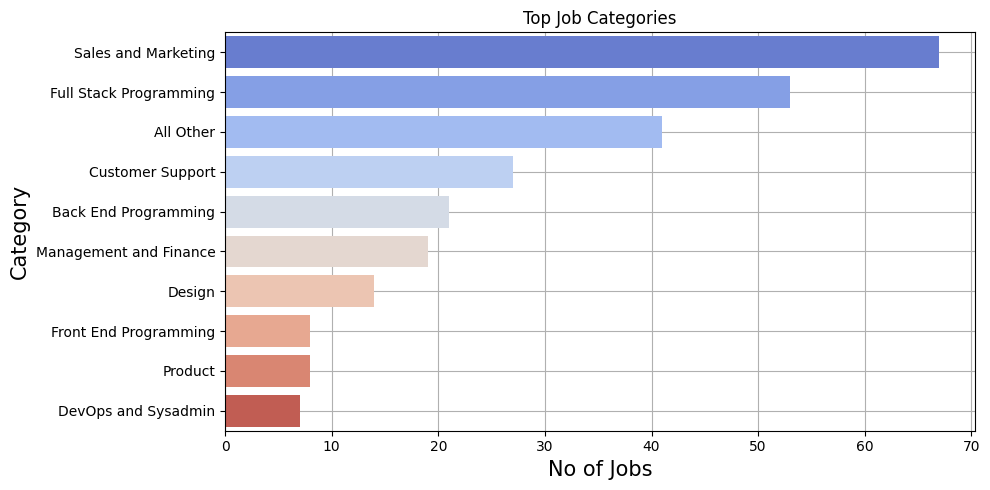

In [5]:
plt.figure(figsize=(10,5))
plt.title("Top Job Categories")
comp_count = c_job['category'].value_counts()
sns.barplot(x=comp_count.values, y=comp_count.index, hue=comp_count.index, palette='coolwarm',legend=False)
plt.xlabel("No of Jobs", size=15)
plt.ylabel("Category",size=15)
plt.tight_layout()
plt.grid()
plt.gca().set_axisbelow(True)
plt.show()

# Top companies hiring per category

                                       company  count
category                                             
Sales and Marketing                     Contra      8
Full Stack Programming  Associates Systems LLC      7
Design                                  Contra      6
All Other                                   XM      5
Back End Programming                Proxify AB      4
Customer Support                     NoGigiddy      4
Management and Finance        Maverick Trading      2
Product                                  Toggl      2
Front End Programming                 Multiple      1
DevOps and Sysadmin                   Multiple      1


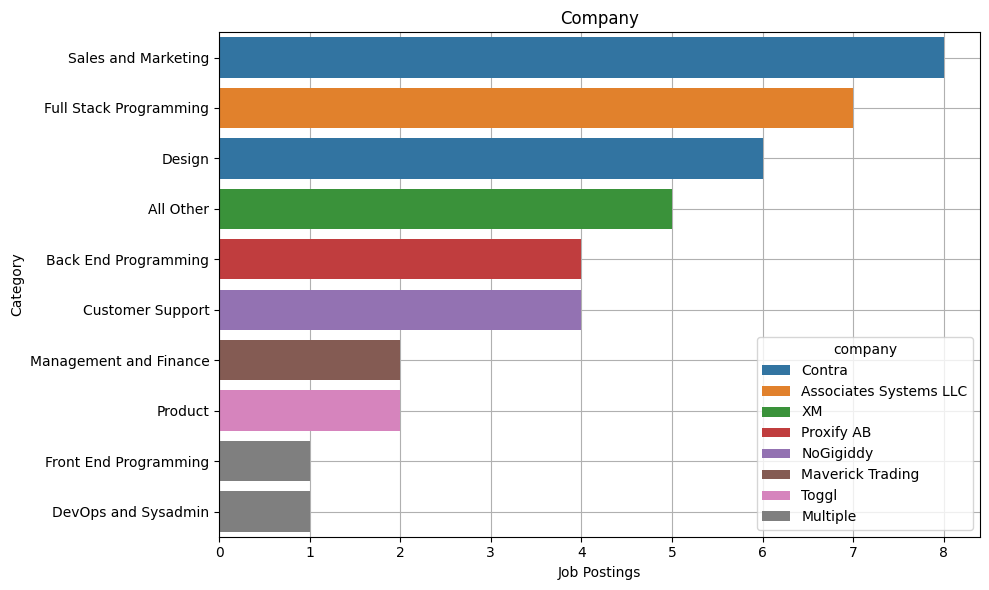

In [104]:
c_job_grp = c_job.groupby(['category', 'company']).size().reset_index(name='count')

top_comp = c_job_grp.sort_values('count', ascending=False).groupby('category').first()

top_comp.loc[top_comp['count'] == 1, 'company'] = 'Multiple'

top_comp = top_comp.sort_values('count', ascending=False)

print(top_comp)

plt.figure(figsize=(10, 6))
sns.barplot(top_comp, x='count', y='category', hue='company')
plt.title('Top Hiring Company per Job Category')
plt.xlabel('Job Postings')
plt.ylabel('Category')
plt.title('Company')
plt.tight_layout()
plt.grid()
plt.gca().set_axisbelow(True)
plt.show()

# Companies with most job openings

company
Contra                       21
Proxify AB                   10
NoGigiddy                     8
Associates Systems LLC        7
Walter                        5
XM                            5
HubSpot                       4
Toggl                         4
Elite Software Automation     3
GrowthX                       3
Name: count, dtype: int64


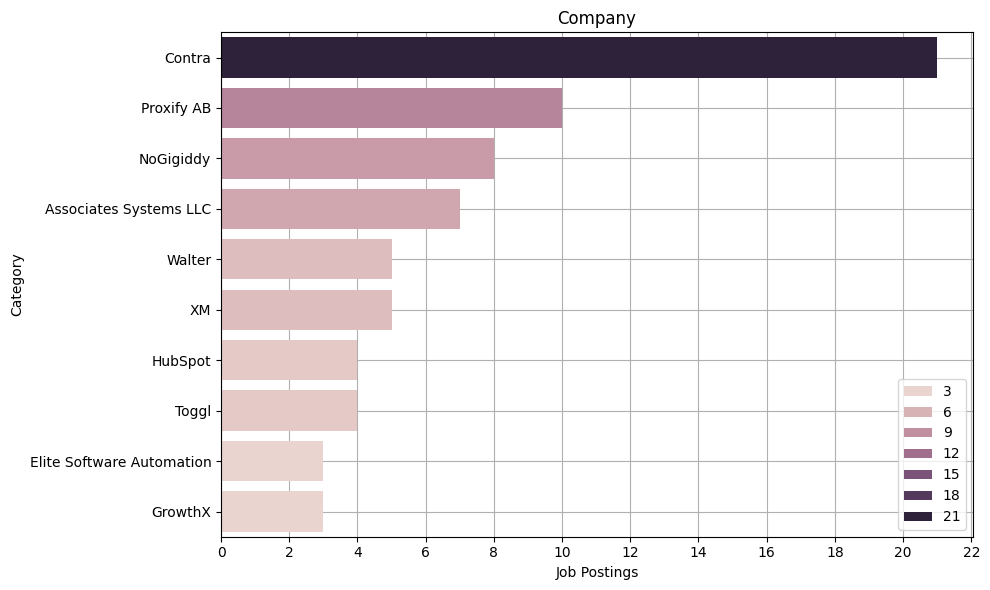

In [105]:
freq_comp = c_job['company'].value_counts().head(10)
print(freq_comp)

plt.figure(figsize=(10, 6))
sns.barplot(x=freq_comp.values, y=freq_comp.index, hue=freq_comp.values)
plt.title('Top Hiring Company per Job Category')
plt.xlabel('Job Postings')
plt.xticks(ticks=range(0, 23, 2))
plt.ylabel('Category')
plt.title('Company')
plt.tight_layout()
plt.grid()
plt.gca().set_axisbelow(True)
plt.show()

# Which day sees more job postings

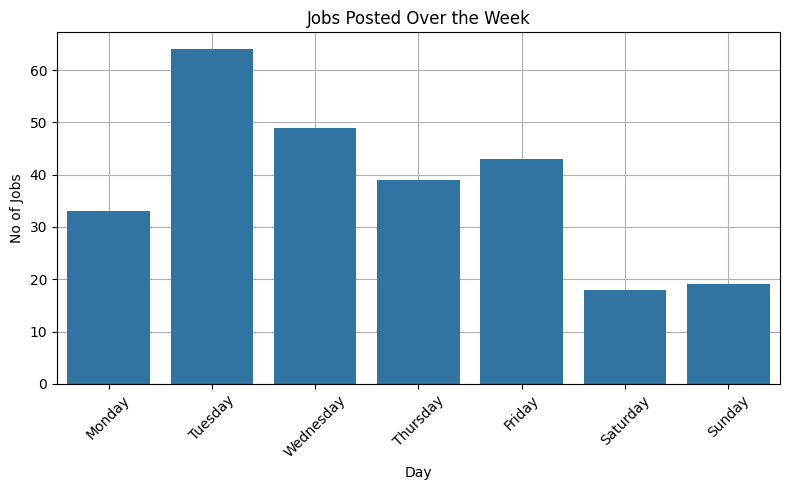

In [7]:
c_job['posted_date'] = pd.to_datetime(c_job['posted_date'])
date_sort = c_job['posted_date'].value_counts().sort_index()
c_job['day_of_week'] = c_job['posted_date'].dt.day_name()

weekday_counts = c_job['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(8, 5))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values)
plt.title("Jobs Posted Over the Week")
plt.ylabel("No of Jobs")
plt.xlabel("Day")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.gca().set_axisbelow(True)
plt.show()

# Job postings for category across the month

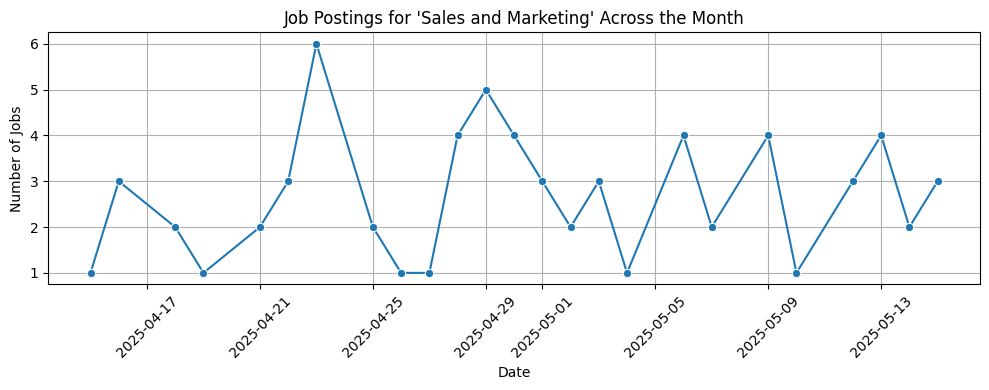

In [107]:
freq_cat = c_job.groupby(['posted_date','category']).size().reset_index(name='count')


cat_data = freq_cat[freq_cat['category'] == 'Sales and Marketing']


plt.figure(figsize=(10, 4))
sns.lineplot(cat_data, x='posted_date', y='count', marker='o')
plt.title("Job Postings for 'Sales and Marketing' Across the Month")
plt.xlabel("Date")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

# Region with most job openings

                 region  count
0          Australia/NZ      1
1           Middle East      2
2         South America      5
3                  Asia      6
4  North America ex. US     14
5                Remote     26
6                Europe     57
7                    US    154


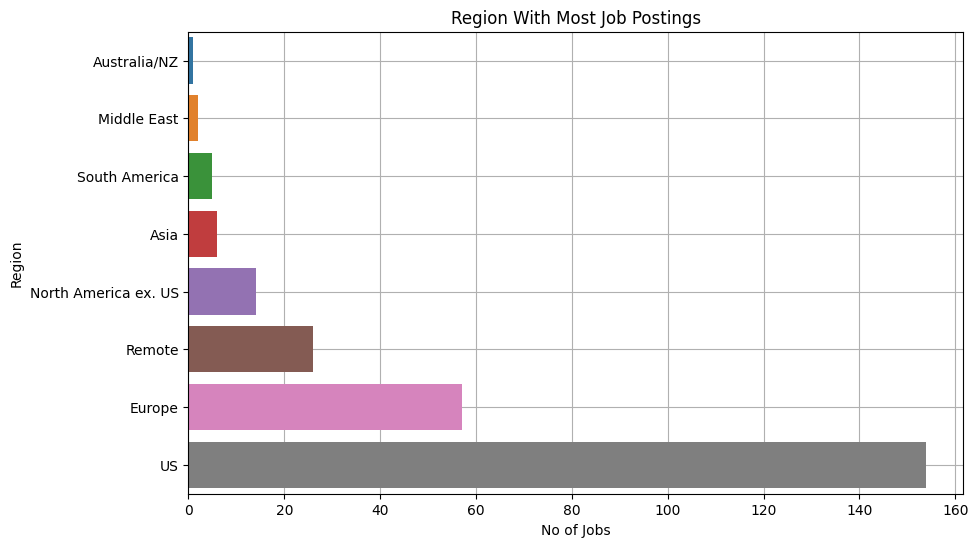

In [108]:
top_reg = c_job['region'].value_counts(ascending=True).reset_index()
print(top_reg)

plt.figure(figsize=(10,6))
sns.barplot(top_reg, x='count', y='region',hue='region')
plt.xlabel("No of Jobs")
plt.ylabel("Region")
plt.title("Region With Most Job Postings")
plt.grid()
plt.gca().set_axisbelow(True)
plt.show()

# Distribution of job postings per category over time

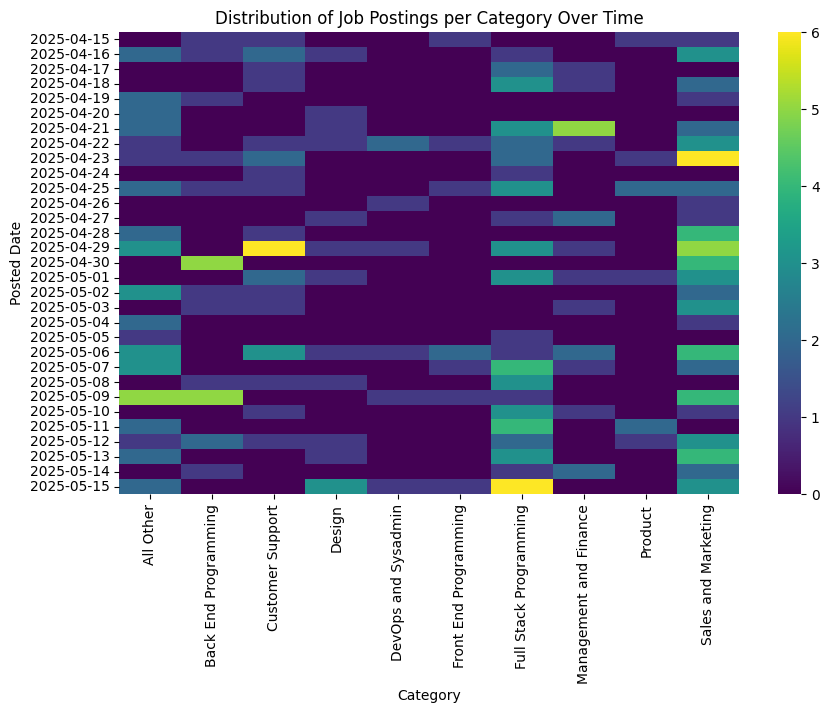

In [8]:
post_activity = c_job.pivot_table(index='posted_date',columns='category',aggfunc='size', fill_value=0)
post_activity.index = post_activity.index.date

plt.figure(figsize=(10,6))
sns.heatmap(post_activity, cmap='viridis')
plt.title("Distribution of Job Postings per Category Over Time")
plt.xlabel("Category")
plt.ylabel("Posted Date")
plt.show()

In [110]:
c_job.head()

,title,company,category,days_since_posted,location,url,region,posted_date,day_of_week
0,AI Automation Expert,Contra,Full Stack Programming,0,"San Francisco, CA",https://weworkremotely.com/company/contra,US,2025-05-15,Thursday
1,Remote Full-Stack TypeScript Engineer,Glama,Full Stack Programming,0,"Miami, FL",https://weworkremotely.com/company/glama,US,2025-05-15,Thursday
2,Senior React Full-stack Developer,Lemon.io,Full Stack Programming,0,"New York, NY",https://weworkremotely.com/company/lemon-io,US,2025-05-15,Thursday
3,PHP Full-Stack Developer,OnTheGoSystems,Full Stack Programming,2,100% remote,https://weworkremotely.com/company/onthegosystems,Remote,2025-05-13,Tuesday
4,RoR Full-Stack Developer,OnTheGoSystems,Full Stack Programming,2,100% remote,https://weworkremotely.com/company/onthegosystems,Remote,2025-05-13,Tuesday


# Creating Job Level feature based on Job Title

In [111]:
c_job['lowertitle'] = c_job['title'].str.lower()

conditions = [
    c_job['lowertitle'].str.contains(r'\bjunior\b|\bjr\b|\bintern\b|\btrainee\b'),
    c_job['lowertitle'].str.contains(r'\blead\b|\bprincipal\b|\bhead\b|\bsenior\b|\bsr\b'),
    c_job['lowertitle'].str.contains(r'\bmanager\b|\bdirector\b|\bvp\b|\bchief\b|\bceo\b|\bcto\b|\bcxo\b'),
]

levels = [
    'Junior',
    'Senior',
    'Managerial'
]

c_job['job_level'] = np.select(conditions, levels, default='Mid-Level / Not Specified')

c_job.drop(columns = 'lowertitle', inplace=True)

c_job.head()

,title,company,category,days_since_posted,location,url,region,posted_date,day_of_week,job_level
0,AI Automation Expert,Contra,Full Stack Programming,0,"San Francisco, CA",https://weworkremotely.com/company/contra,US,2025-05-15,Thursday,Mid-Level / Not Specified
1,Remote Full-Stack TypeScript Engineer,Glama,Full Stack Programming,0,"Miami, FL",https://weworkremotely.com/company/glama,US,2025-05-15,Thursday,Mid-Level / Not Specified
2,Senior React Full-stack Developer,Lemon.io,Full Stack Programming,0,"New York, NY",https://weworkremotely.com/company/lemon-io,US,2025-05-15,Thursday,Senior
3,PHP Full-Stack Developer,OnTheGoSystems,Full Stack Programming,2,100% remote,https://weworkremotely.com/company/onthegosystems,Remote,2025-05-13,Tuesday,Mid-Level / Not Specified
4,RoR Full-Stack Developer,OnTheGoSystems,Full Stack Programming,2,100% remote,https://weworkremotely.com/company/onthegosystems,Remote,2025-05-13,Tuesday,Mid-Level / Not Specified


# Insights

## What was the Data about?
    I analyzed job postings from WeWorkRemotely.com to understand hiring trends across categories, companies, regions, and weekdays.

## Key Findings and Implications

### Top Hiring Categories 
The most in-demand categories were Sales and Marketing, Design, and Full Stack Programming. These categories consistently had the highest number of job postings.
- Implication: Job candidates with skills in these categories will likely have more oppurunities to find a job. 
    
### Top Hiring Companies Per Category 
Contra had the most listings in Design and Sales, while Associate Systems LLC posted more in Full Stack Programming. This indicates that these companies specialize in specific roles and reflects their business focus.
- Implication: We can figure out the competetiveness in certain categories and candidates applying to certain companies can align their applications based on these trends.
    
### Top Hiring Companies Overall 
Few companies posted jobs across the categories, with Contra coming on top. These companies might be undergoing a rapid expansion and faster recruitement cycle. 
- Implication: Candidates can know which companies are the top hiring firms due to their consistent hiring activity and fast recruitment cycle.
    
### Job Posting Frequency Across the Week 
Analysis of which day sees more job postings revealed that Monday-Friday are the most active for companies to be publishing jobs with Tuesday being higher than others. Activity drops on weekends.
- Implication: Candidates can check postings early in the week to find new job postings. Companies can optimize their posting schedule to align the peak activity of candidates for maximum visibility.
    
### Region with Most Job Openings 
Jobs were posted across various regions but US jobs dominated the list with more than half being US based jobs. Some regions had minimal representation - This could either reflect platform-based bias or actual demand.
- Implication: Candidates requiring roles in certain timezones or regions can tailor their search based on this data.
    
### Distribution of job postings per category over time 
Using a time based heatmap, the data showed how active were each categories across the dataset's timeline. Some had consistent growth while others had on and offs across time periods. This can give insight about seasonal hiring behaviour.
- Implication: Both Candidates and Recruiters can align their timing with hiring peaks. Companies can study their competitors behaviour or planning.

## Outliers and Anomalies
- Unusual hiring spike on a Tuesday. This sudden surge may correspond to hiring events, funding rounds or even automates posting tools.
- A few regions had very few activity, with US region being the most active exceeding the rest. Whether this is an example of platform-based bias or actual low demand is unclear.
- Many companies had only one or two jobs posted. These companies were categorized as a "Multiple" group. This indicates a long list of recruiters who only occasionally post job openings.
- The Job Level attribute is based on the job title. As not many have levels on the titles, it could be inaccurate